In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos dados

In [105]:
df = pd.read_csv("paises-prova-2023.csv")
# df_not_null = df[pd.isnull(df['mortalidade_infantil_por_1000']) == False]
df

,Unnamed: 0,pais,regiao,populacao,area,densidade_populacional,area_costeira,migracao,mortalidade_infantil_por_1000,GDP,...,telefone_por_1000,terra_plantavel,cultivo,outro,clima,taxa_natalidade,taxa_mortalidade,agricultura,industria,servico
0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


#### Questao 1

In [106]:
paises = df['pais'].unique().size
regioes = df['regiao'].unique().size

print("Qt paises",paises)
print('Qt regioes', regioes)

Qt paises 227
Qt regioes 11


#### Questao 2

In [107]:
menor_mortalidade = df.groupby(['regiao'])['mortalidade_infantil_por_1000'].mean().sort_values()[:1].index[0]

print('Pais com menor mortalidade por 1000: ', menor_mortalidade)

Pais com menor mortalidade por 1000:  WESTERN EUROPE


#### Questao 3

In [108]:
menor_populacao = df.groupby(['pais'])['populacao'].min().sort_values(ascending=True).index[0]
maior_populacao = df.groupby(['pais'])['populacao'].max().sort_values(ascending=False).index[0]

print("Maior populacao: ", maior_populacao)
print("Menor populacao: ", menor_populacao)


Maior populacao:  China
Menor populacao:  St Pierre & Miquelon


#### Questao 4

<Axes: xlabel='regiao'>

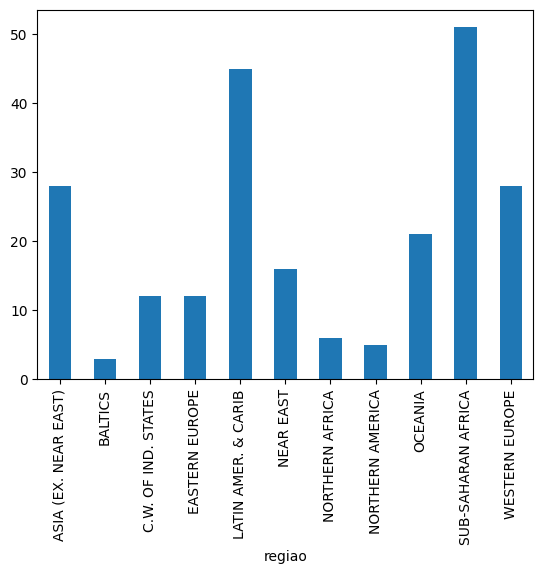

In [109]:
df.groupby(['regiao'])['pais'].count().plot(kind='bar')


#### Questao 5

In [110]:
percentil_90 = df['GDP'].quantile(.90)
print("Porcentil 90 do GDP: ",percentil_90)

brazil_gdp = df[df['pais']=='Brazil']['GDP'].values[0]
percentil_brazil = sum(np.abs(df['GDP']) < brazil_gdp) / float(len(df['GDP']))*100
print("Percentil do GDP brasileiro: {} %".format(percentil_brazil))


Porcentil 90 do GDP:  26900.0
Percentil do GDP brasileiro: 58.590308370044056 %


#### Questao 6

In [111]:
def confidence_interval(data):
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    return (mean-(1.96*std_error)),(mean+(1.96*std_error))

In [112]:
print("Intervalo de confianca para a mortalidade por 1000: ", confidence_interval(df['mortalidade_infantil_por_1000']))
print("Intervalo de confianca para a taxa de natalidade: ", confidence_interval(df['taxa_natalidade']))

Intervalo de confianca para a mortalidade por 1000:  (30.90310052684361, 40.110828044584956)
Intervalo de confianca para a taxa de natalidade:  (20.6607557779754, 23.568708507738894)


#### Resposta Questao 6
Com base no intervalo de confiança (mostrado acima) dos valores para cada uma das colunas, o valor 22 é mais provável de ser um valor pertencente a taxa de natalidade

#### Questao 7

In [113]:
# media_latin_region = df[df['']]
media_latin_region = df[df['regiao'] == "LATIN AMER. & CARIB"]['populacao'].mean()
media_sub_saha = df[df['regiao'] == "SUB-SAHARAN AFRICA"]['populacao'].mean()

desvio_latin_region = df[df['regiao'] == "LATIN AMER. & CARIB"]['populacao'].std()
desvio_sub_saha = df[df['regiao'] == "SUB-SAHARAN AFRICA"]['populacao'].std()

qt_paises_sub = df[df['regiao'] == "SUB-SAHARAN AFRICA"]['pais'].count()

print("Media da populacao de LATIN...: ", media_latin_region)
print("Media da populacao de SUB-SAHA...: ", media_sub_saha)

print("Desvio da populacao de LATIN...: ", desvio_latin_region)
print("Desvio da populacao de SUB-SAHA...: ", desvio_sub_saha)

erro = desvio_latin_region / np.sqrt(qt_paises_sub)
distance = abs(media_latin_region - media_sub_saha) / erro

print("\n\nMedia da populacao das regioes sao iguais ?:", True if distance < 3*erro else False)



Media da populacao de LATIN...:  12484991.08888889
Media da populacao de SUB-SAHA...:  14694843.137254901
Desvio da populacao de LATIN...:  32353969.310905356
Desvio da populacao de SUB-SAHA...:  23091892.704227272


Media da populacao das regioes sao iguais ?: True


#### Resposta Questao 7
Sim, o cálculo acima mostra que as médias das duas regiões são iguais

#### Questao 8

<Axes: xlabel='populacao', ylabel='area'>

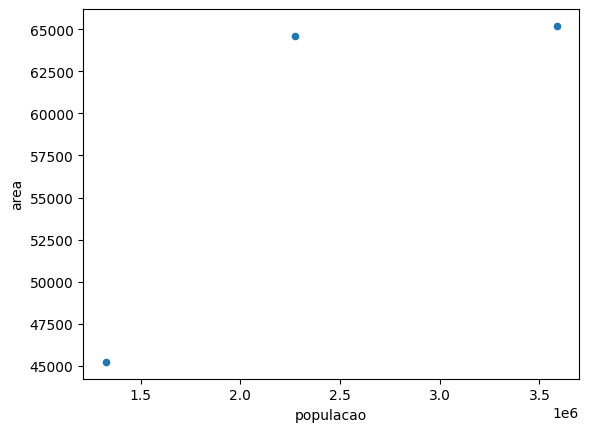

In [114]:
df[df['regiao'] == "BALTICS"].plot(x="populacao", y="area", kind="scatter")


#### Questao 9

<Axes: xlabel='regiao'>

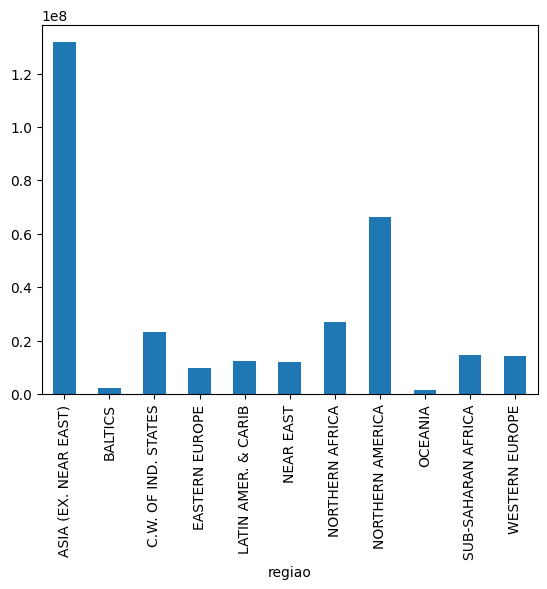

In [115]:
df.groupby(['regiao'])['populacao'].mean().plot.bar()